<a href="https://colab.research.google.com/github/AnanyaGodse/Image-Processing-and-Computer-Vision-I/blob/main/IPCV_Experiment_7_Morphological_Operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name: Ananya Godse SAP ID: 60009220161 Batch: D1-1**

### **LAB 7 - Morphological Operations (Erosion, Dilation, Closing, Opening, Hit & Miss Transformation)**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img = cv2.imread('castle.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

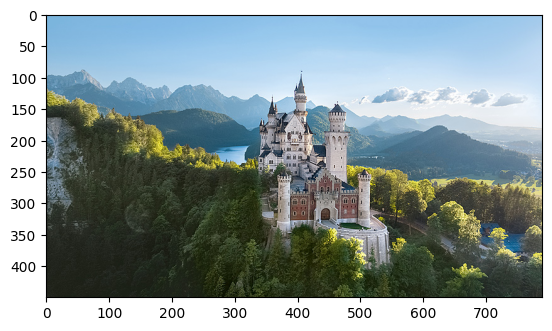

In [ ]:
plt.imshow(img)
plt.show()

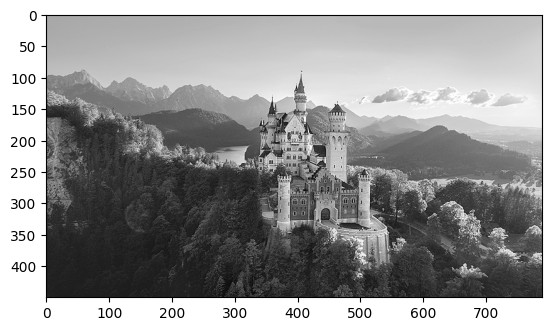

In [ ]:
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_img, cmap='gray')
plt.show()

**Converting the gray scale image to binary:**

In [ ]:
threshold = 128

binary_img = gray_img.copy()

for i in range(binary_img.shape[0]):
    for j in range(binary_img.shape[1]):
        if binary_img[i, j] > threshold:
            binary_img[i, j] = 1
        else:
            binary_img[i, j] = 0

binary_img = binary_img.astype(np.uint8)

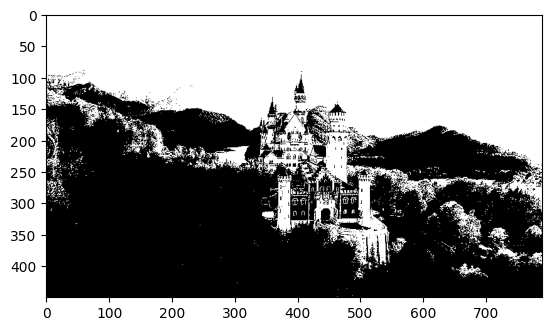

In [ ]:
plt.imshow(binary_img, cmap='gray')
plt.show()

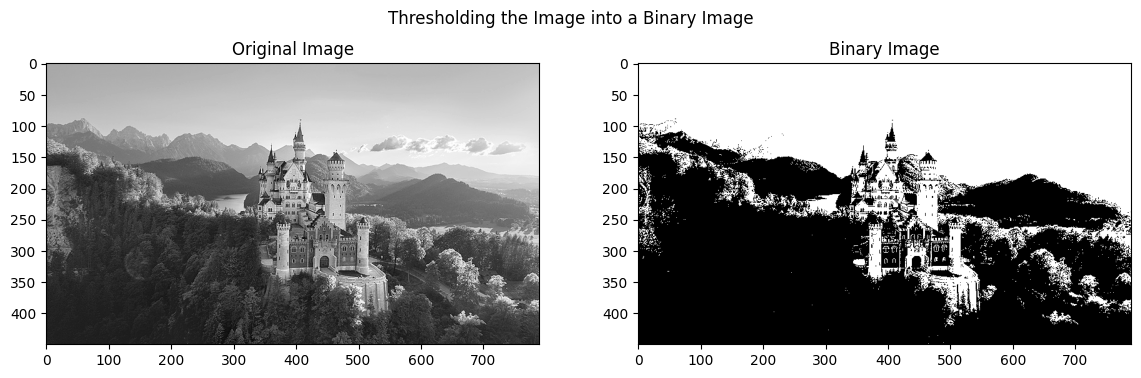

In [ ]:
plt.figure(figsize=(14, 4))
plt.suptitle("Thresholding the Image into a Binary Image")

plt.subplot(1, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(binary_img, cmap='gray')
plt.title("Binary Image")

plt.show()

**Defining the kernel:**

In [ ]:
kernel = np.ones((3, 3), dtype=np.uint8)
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

**Erosion:**

Erosion reduces the size of objects in a binary image by "shrinking" the boundaries of the foreground (white) pixels. A pixel in the output is set to 1 only if all the pixels under the kernel are 1.

***Application:***  Used to remove small noise, detach connected objects, and shrink foreground objects. Commonly used in tasks like removing small, irrelevant white spots or reducing the size of regions in an image.


In [ ]:
def erode(image, kernel):
    img_height, img_width = image.shape
    kernel_height, kernel_width = kernel.shape
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    output_image = np.zeros_like(image)

    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), 'constant')

    for i in range(img_height):
        for j in range(img_width):
            neighborhood = padded_image[i:i + kernel_height, j:j + kernel_width]

            if np.all(neighborhood == 1):
                output_image[i, j] = 1
            else:
                output_image[i, j] = 0

    return output_image

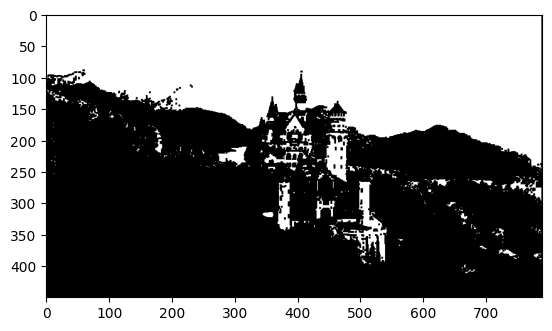

In [ ]:
eroded_img = erode(binary_img, kernel)

plt.imshow(eroded_img, cmap='gray')
plt.show()

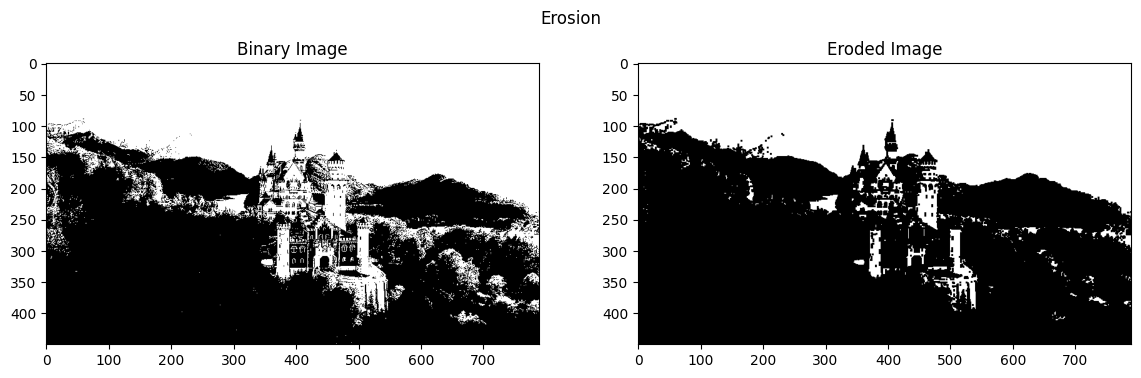

In [ ]:
plt.figure(figsize=(14, 4))
plt.suptitle("Erosion")

plt.subplot(1, 2, 1)
plt.imshow(binary_img, cmap='gray')
plt.title("Binary Image")

plt.subplot(1, 2, 2)
plt.imshow(eroded_img, cmap='gray')
plt.title("Eroded Image")

plt.show()

**Dilation:**

Dilation enlarges the boundaries of foreground objects in a binary image. A pixel in the output is set to 1 if any pixel under the kernel is 1.


***Application:*** Used to fill in small holes, connect broken parts of objects, or expand object boundaries. It helps in increasing the size of regions and merging small disconnected components.

In [ ]:
def dilate(image, kernel):
    img_height, img_width = image.shape
    kernel_height, kernel_width = kernel.shape
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    output_image = np.zeros_like(image)

    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), 'constant')

    for i in range(img_height):
        for j in range(img_width):
            neighborhood = padded_image[i:i + kernel_height, j:j + kernel_width]

            if np.any(neighborhood == 1):
                output_image[i, j] = 1
            else:
                output_image[i, j] = 0

    return output_image


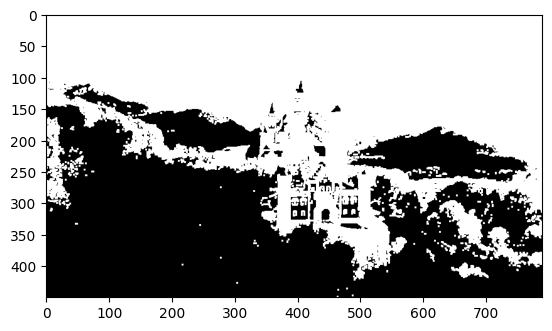

In [ ]:
dilated_img = dilate(binary_img, kernel)

plt.imshow(dilated_img, cmap='gray')
plt.show()

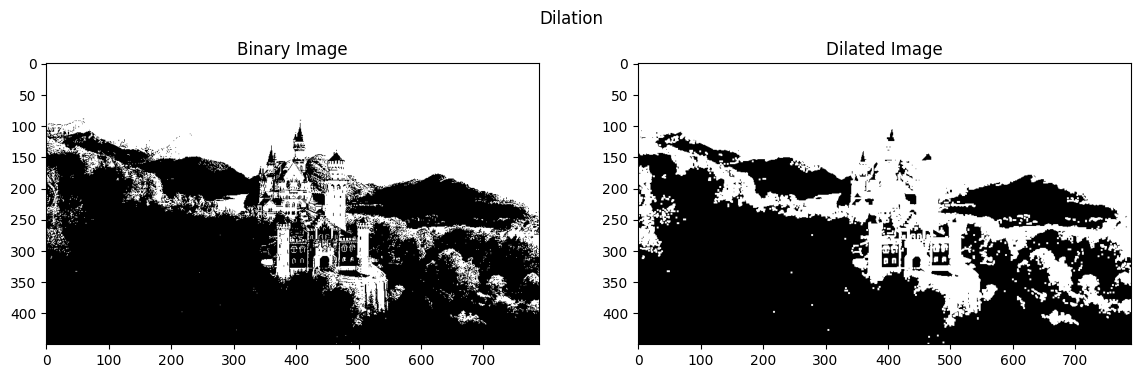

In [ ]:
plt.figure(figsize=(14, 4))
plt.suptitle("Dilation")

plt.subplot(1, 2, 1)
plt.imshow(binary_img, cmap='gray')
plt.title("Binary Image")

plt.subplot(1, 2, 2)
plt.imshow(dilated_img, cmap='gray')
plt.title("Dilated Image")

plt.show()

**Opening:**

Opening is a morphological operation that involves erosion followed by dilation. It removes small objects or noise from the foreground while maintaining the shape and size of larger objects.

***Application:*** Useful for removing noise while keeping the overall shape of objects intact. It smooths the contour of objects, eliminates small objects, and can separate touching objects in binary images.

In [ ]:
def open(image, kernel):
    eroded_image = erode(image, kernel)
    opened_image = dilate(eroded_image, kernel)
    return opened_image

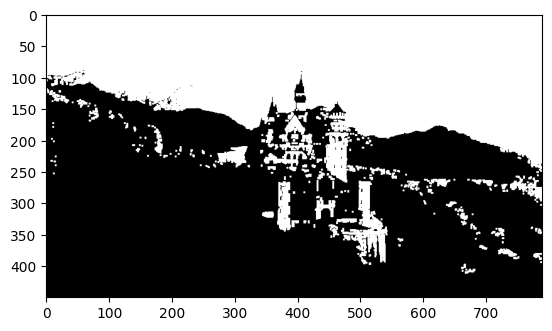

In [ ]:
opened_img = open(binary_img, kernel)

plt.imshow(opened_img, cmap='gray')
plt.show()

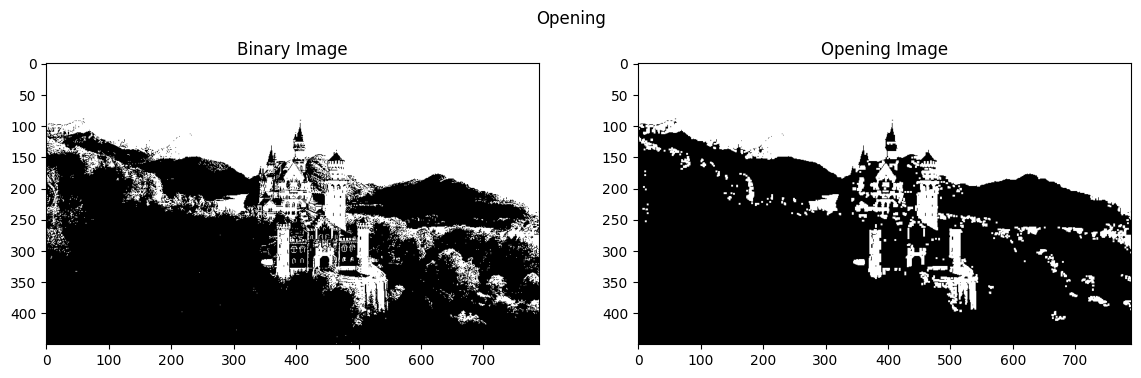

In [ ]:
plt.figure(figsize=(14, 4))
plt.suptitle("Opening")

plt.subplot(1, 2, 1)
plt.imshow(binary_img, cmap='gray')
plt.title("Binary Image")

plt.subplot(1, 2, 2)
plt.imshow(opened_img, cmap='gray')
plt.title("Opening Image")

plt.show()

**Closing:**

Closing involves dilation followed by erosion. It fills small holes and gaps in the foreground objects while preserving the original shape.

***Application:*** Used to close small holes, fill gaps between objects, and smooth object boundaries. It is helpful when you want to preserve object shapes but remove small gaps or holes.

In [ ]:
def close(image, kernel):
    dilated_image = dilate(image, kernel)
    closed_image = erode(dilated_image, kernel)
    return closed_image

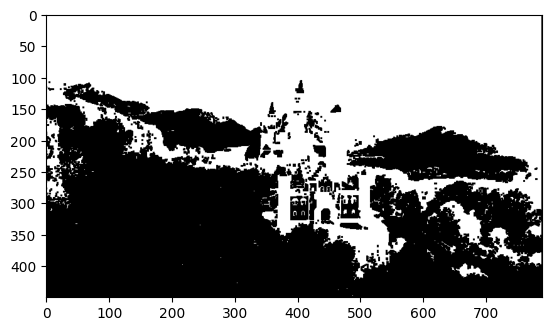

In [ ]:
closed_img = close(binary_img, kernel)

plt.imshow(closed_img, cmap='gray')
plt.show()

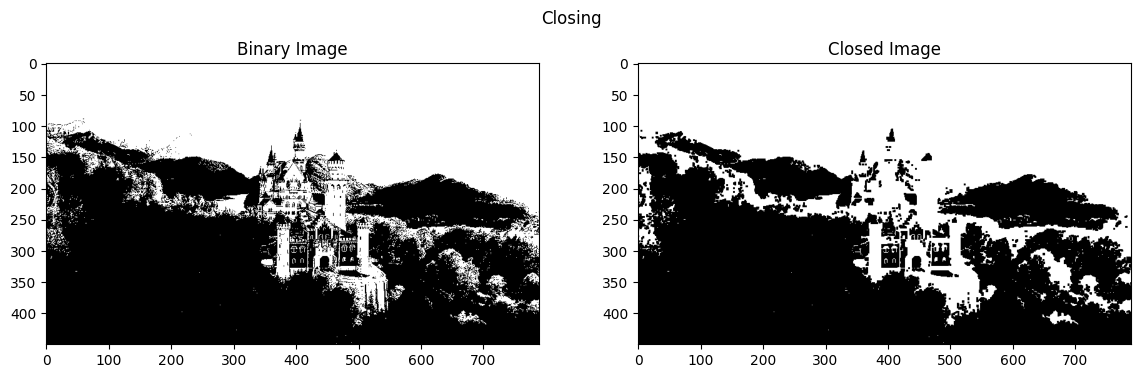

In [ ]:
plt.figure(figsize=(14, 4))
plt.suptitle("Closing")

plt.subplot(1, 2, 1)
plt.imshow(binary_img, cmap='gray')
plt.title("Binary Image")

plt.subplot(1, 2, 2)
plt.imshow(closed_img, cmap='gray')
plt.title("Closed Image")

plt.show()

**Hit and Miss Transformation:**

Hit-and-Miss is a morphological operation that detects specific shapes or patterns in a binary image by comparing the foreground and background simultaneously using a pair of kernels. It identifies locations where the image perfectly matches the shape specified by the kernel.

***Application:*** Used for detecting specific patterns, shapes, or configurations in binary images. It is helpful in shape matching, skeletonization, and thinning processes where specific features like corners or endpoints need to be detected and extracted from an image

In [ ]:
def hit_and_miss(image, kernel):
    img_height, img_width = image.shape
    kernel_height, kernel_width = kernel.shape
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    output_image = np.zeros_like(image)

    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), 'constant')

    for i in range(pad_height, img_height + pad_height):
        for j in range(pad_width, img_width + pad_width):
            neighborhood = padded_image[i - pad_height:i + pad_height + 1, j - pad_width:j + pad_width + 1]
            kernel_match = (neighborhood == kernel) | (kernel == 0)

            if np.all(kernel_match):
                output_image[i - pad_height, j - pad_width] = 1

    return output_image


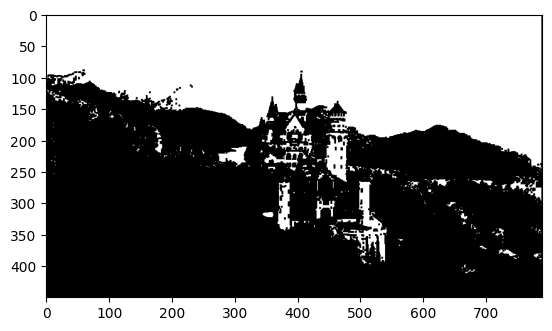

In [ ]:
hit_miss_img = hit_and_miss(binary_img, kernel)

plt.imshow(hit_miss_img, cmap='gray')
plt.show()

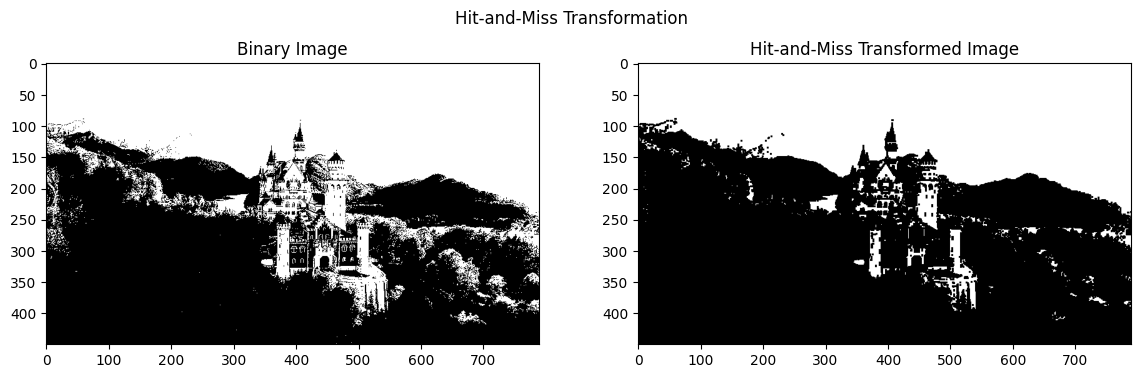

In [ ]:
plt.figure(figsize=(14, 4))
plt.suptitle("Hit-and-Miss Transformation")

plt.subplot(1, 2, 1)
plt.imshow(binary_img, cmap='gray')
plt.title("Binary Image")

plt.subplot(1, 2, 2)
plt.imshow(hit_miss_img, cmap='gray')
plt.title("Hit-and-Miss Transformed Image")

plt.show()

**Conclusion:**

We successfully performed erosion, dilation, opening, closing and hit-and-miss operations on an image, and also studied their applications.